Dataset shape: (284807, 31)


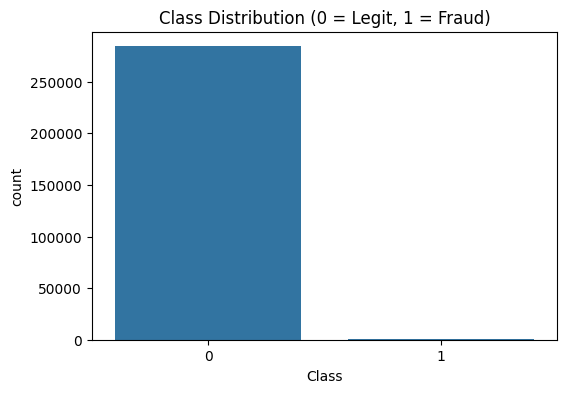

Fraud vs Legit ratio:
 Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64
Training model...
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



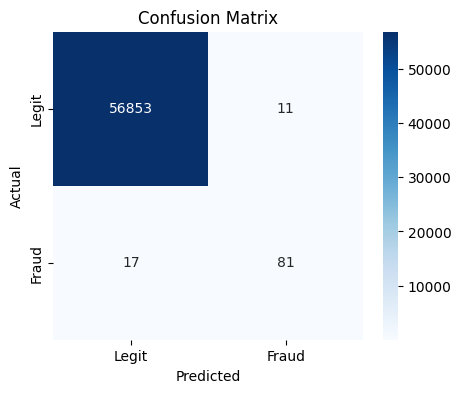

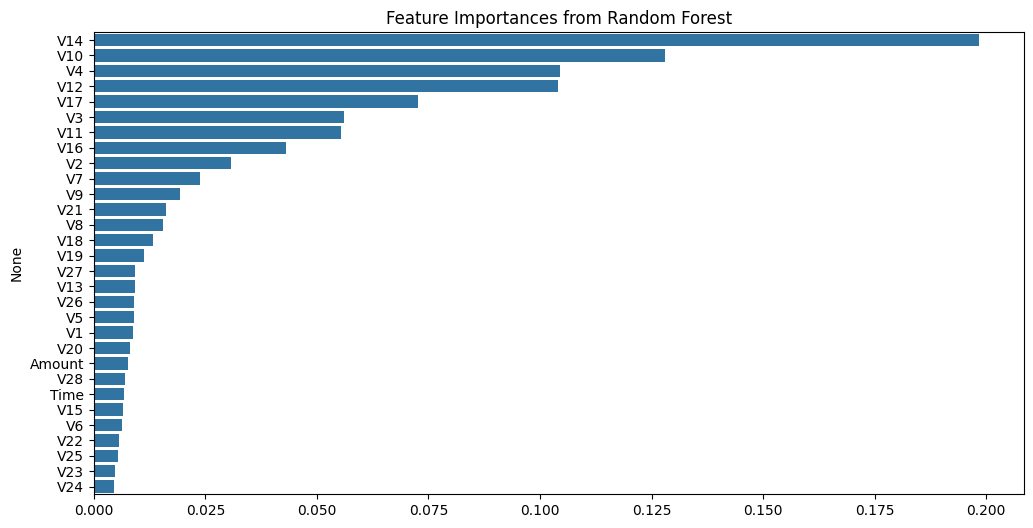

Model saved as model.joblib


,Sample Index,Prediction (1=Fraud),Fraud Probability
0,263020,0,0.000000
1,11378,0,0.000000
2,147283,0,0.060000
3,219439,0,0.000000
4,36939,0,0.006667


In [4]:
# 1 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# 2 Upload CSV
df = pd.read_csv("creditcard.csv")
print("Dataset shape:", df.shape)
df.head()

# 3 Visualize class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()

# Percentage of frauds
fraud_ratio = df['Class'].value_counts(normalize=True)
print("Fraud vs Legit ratio:\n", fraud_ratio)

# 4 Split features and target
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5 Build pipeline with scaling + SMOTE + RandomForest
pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("smote", SMOTE()),
    ("rf", RandomForestClassifier(n_estimators=150, random_state=42))
])

# 6 Train model
print("Training model...")
pipeline.fit(X_train, y_train)

# 7 Evaluate model
preds = pipeline.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, preds))

# Confusion matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit","Fraud"], yticklabels=["Legit","Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 8 Feature importance visualization
rf_model = pipeline.named_steps['rf']
features = X.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances from Random Forest")
plt.show()

# 9 Save trained model
joblib.dump(pipeline, "model.joblib")
print("Model saved as model.joblib")

# 10 Example predictions
sample = X_test.iloc[:5]
sample_preds = pipeline.predict(sample)
sample_probs = pipeline.predict_proba(sample)[:,1]
results = pd.DataFrame({
    "Sample Index": sample.index,
    "Prediction (1=Fraud)": sample_preds,
    "Fraud Probability": sample_probs
})
results
